In [2]:
!pip install plotly

  Using cached plotly-6.3.0-py3-none-any.whl.metadata (8.5 kB)
Using cached plotly-6.3.0-py3-none-any.whl (9.8 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Brazilian E-Commerce Exploratory Data Analysis
# Olist Dataset - Phase 2: Exploratory Analysis and Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime
import os

In [4]:
# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set up paths relative to project structure
DATA_PATH = '../data/processed/'
RAW_DATA_PATH = '../data/raw/'
REPORTS_PATH = '../reports/'

print("🛒 Brazilian E-Commerce Dataset - Exploratory Analysis")
print("=" * 60)

🛒 Brazilian E-Commerce Dataset - Exploratory Analysis


In [5]:
def load_processed_data():
    """Load all processed datasets"""
    datasets = {}
    
    # Check if processed data exists, otherwise load raw data
    if os.path.exists(os.path.join(DATA_PATH, 'master_dataset.csv')):
        print("✅ Loading master dataset...")
        datasets['master'] = pd.read_csv(os.path.join(DATA_PATH, 'master_dataset.csv'))
    
    if os.path.exists(os.path.join(DATA_PATH, 'cleaned_orders.csv')):
        print("✅ Loading cleaned orders...")
        datasets['orders'] = pd.read_csv(os.path.join(DATA_PATH, 'cleaned_orders.csv'))
    
    if os.path.exists(os.path.join(DATA_PATH, 'cleaned_customers.csv')):
        print("✅ Loading cleaned customers...")
        datasets['customers'] = pd.read_csv(os.path.join(DATA_PATH, 'cleaned_customers.csv'))
    
    # If processed data doesn't exist, load raw data
    if not datasets:
        print("⚠️  Processed data not found, loading raw datasets...")
        raw_files = {
            'orders': 'olist_orders_dataset.csv',
            'order_items': 'olist_order_items_dataset.csv',
            'customers': 'olist_customers_dataset.csv',
            'products': 'olist_products_dataset.csv',
            'sellers': 'olist_sellers_dataset.csv',
            'payments': 'olist_order_payments_dataset.csv',
            'reviews': 'olist_order_reviews_dataset.csv',
            'geolocation': 'olist_geolocation_dataset.csv'
        }
        
        for key, filename in raw_files.items():
            filepath = os.path.join(RAW_DATA_PATH, filename)
            if os.path.exists(filepath):
                datasets[key] = pd.read_csv(filepath)
                print(f"✅ Loaded {key}: {datasets[key].shape}")
    
    return datasets

In [6]:
# Load data
datasets = load_processed_data()


✅ Loading cleaned orders...
✅ Loading cleaned customers...


In [7]:
# === DATA OVERVIEW ===
print("\n📊 DATASET OVERVIEW")
print("=" * 40)

for name, df in datasets.items():
    print(f"\n{name.upper()}:")
    print(f"  Shape: {df.shape}")
    print(f"  Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"  Columns: {list(df.columns)}")


📊 DATASET OVERVIEW

ORDERS:
  Shape: (99441, 8)
  Memory usage: 58.12 MB
  Columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

CUSTOMERS:
  Shape: (99441, 5)
  Memory usage: 29.62 MB
  Columns: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [8]:
# === ORDERS ANALYSIS ===
def analyze_orders(orders_df):
    """Comprehensive orders analysis"""
    print("\n🛍️ ORDERS ANALYSIS")
    print("=" * 40)
    
    # Convert date columns
    date_columns = [col for col in orders_df.columns if 'timestamp' in col or 'date' in col]
    for col in date_columns:
        if col in orders_df.columns:
            orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')
    
    # Order status distribution
    if 'order_status' in orders_df.columns:
        status_counts = orders_df['order_status'].value_counts()
        print(f"\n📋 Order Status Distribution:")
        for status, count in status_counts.items():
            pct = (count / len(orders_df)) * 100
            print(f"  {status}: {count:,} ({pct:.1f}%)")
    
    # Time-based analysis
    if 'order_purchase_timestamp' in orders_df.columns:
        orders_df['purchase_date'] = orders_df['order_purchase_timestamp'].dt.date
        orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
        orders_df['purchase_year'] = orders_df['order_purchase_timestamp'].dt.year
        orders_df['purchase_weekday'] = orders_df['order_purchase_timestamp'].dt.day_name()
        orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour
        
        print(f"\n📅 Time Range: {orders_df['purchase_date'].min()} to {orders_df['purchase_date'].max()}")
        print(f"📈 Total Orders: {len(orders_df):,}")
        
        # Monthly trends
        monthly_orders = orders_df.groupby('purchase_month').size()
        print(f"📊 Peak Month: {monthly_orders.idxmax()} ({monthly_orders.max():,} orders)")
    
    return orders_df

In [9]:
# === CUSTOMER ANALYSIS ===
def analyze_customers(customers_df):
    """Customer demographics and geographic analysis"""
    print("\n👥 CUSTOMER ANALYSIS")
    print("=" * 40)
    
    print(f"👤 Total Unique Customers: {len(customers_df):,}")
    
    if 'customer_state' in customers_df.columns:
        state_dist = customers_df['customer_state'].value_counts().head(10)
        print(f"\n🗺️  Top 10 States by Customer Count:")
        for state, count in state_dist.items():
            pct = (count / len(customers_df)) * 100
            print(f"  {state}: {count:,} ({pct:.1f}%)")
    
    if 'customer_city' in customers_df.columns:
        city_dist = customers_df['customer_city'].value_counts().head(5)
        print(f"\n🏙️  Top 5 Cities:")
        for city, count in city_dist.items():
            print(f"  {city}: {count:,}")
    
    return customers_df

In [10]:
# === PRODUCT ANALYSIS ===
def analyze_products(products_df, order_items_df=None):
    """Product category and pricing analysis"""
    print("\n📦 PRODUCT ANALYSIS")
    print("=" * 40)
    
    print(f"📋 Total Products: {len(products_df):,}")
    
    if 'product_category_name' in products_df.columns:
        category_counts = products_df['product_category_name'].value_counts().head(10)
        print(f"\n🏷️  Top 10 Product Categories:")
        for category, count in category_counts.items():
            print(f"  {category}: {count:,}")
    
    # Product dimensions analysis
    numeric_cols = ['product_name_lenght', 'product_description_lenght', 
                   'product_photos_qty', 'product_weight_g', 
                   'product_length_cm', 'product_height_cm', 'product_width_cm']
    
    available_cols = [col for col in numeric_cols if col in products_df.columns]
    if available_cols:
        print(f"\n📏 Product Dimensions Summary:")
        print(products_df[available_cols].describe())
    
    return products_df

In [11]:
# === PAYMENT ANALYSIS ===
def analyze_payments(payments_df):
    """Payment methods and values analysis"""
    print("\n💳 PAYMENT ANALYSIS")
    print("=" * 40)
    
    if 'payment_type' in payments_df.columns:
        payment_types = payments_df['payment_type'].value_counts()
        print(f"\n💰 Payment Methods:")
        for method, count in payment_types.items():
            pct = (count / len(payments_df)) * 100
            print(f"  {method}: {count:,} ({pct:.1f}%)")
    
    if 'payment_value' in payments_df.columns:
        print(f"\n💵 Payment Value Statistics:")
        payment_stats = payments_df['payment_value'].describe()
        for stat, value in payment_stats.items():
            print(f"  {stat}: R$ {value:.2f}")
    
    if 'payment_installments' in payments_df.columns:
        installments = payments_df['payment_installments'].value_counts().sort_index()
        print(f"\n📊 Payment Installments (Top 5):")
        for inst, count in installments.head().items():
            print(f"  {inst} installments: {count:,}")
    
    return payments_df

In [12]:
# Run analyses
if 'orders' in datasets:
    datasets['orders'] = analyze_orders(datasets['orders'])

if 'customers' in datasets:
    datasets['customers'] = analyze_customers(datasets['customers'])

if 'products' in datasets:
    datasets['products'] = analyze_products(datasets['products'], 
                                          datasets.get('order_items'))

if 'payments' in datasets:
    datasets['payments'] = analyze_payments(datasets['payments'])

# === VISUALIZATION SECTION ===
print("\n\n🎨 CREATING VISUALIZATIONS")
print("=" * 50)


🛍️ ORDERS ANALYSIS

📋 Order Status Distribution:
  delivered: 96,478 (97.0%)
  shipped: 1,107 (1.1%)
  canceled: 625 (0.6%)
  unavailable: 609 (0.6%)
  invoiced: 314 (0.3%)
  processing: 301 (0.3%)
  created: 5 (0.0%)
  approved: 2 (0.0%)

📅 Time Range: 2016-09-04 to 2018-10-17
📈 Total Orders: 99,441
📊 Peak Month: 2017-11 (7,544 orders)

👥 CUSTOMER ANALYSIS
👤 Total Unique Customers: 99,441

🗺️  Top 10 States by Customer Count:
  SP: 41,746 (42.0%)
  RJ: 12,852 (12.9%)
  MG: 11,635 (11.7%)
  RS: 5,466 (5.5%)
  PR: 5,045 (5.1%)
  SC: 3,637 (3.7%)
  BA: 3,380 (3.4%)
  DF: 2,140 (2.2%)
  ES: 2,033 (2.0%)
  GO: 2,020 (2.0%)

🏙️  Top 5 Cities:
  Sao Paulo: 15,540
  Rio De Janeiro: 6,882
  Belo Horizonte: 2,773
  Brasilia: 2,131
  Curitiba: 1,521


🎨 CREATING VISUALIZATIONS


In [14]:
# Set up matplotlib
fig_size = (15, 10)
plt.rcParams['figure.figsize'] = fig_size

In [16]:
# 1. Orders Over Time
def plot_orders_timeline(orders_df):
    """Plot orders timeline"""
    if 'purchase_month' not in orders_df.columns:
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('📈 Orders Timeline Analysis', fontsize=16, fontweight='bold')
    
    # Monthly trend
    monthly_orders = orders_df.groupby('purchase_month').size()
    monthly_orders.plot(ax=axes[0,0], kind='line', marker='o', color='steelblue', linewidth=2)
    axes[0,0].set_title('Orders by Month')
    axes[0,0].set_xlabel('Month')
    axes[0,0].set_ylabel('Number of Orders')
    axes[0,0].grid(True, alpha=0.3)
    # Weekday distribution
    if 'purchase_weekday' in orders_df.columns:
        weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        weekday_counts = orders_df['purchase_weekday'].value_counts().reindex(weekday_order)
        weekday_counts.plot(ax=axes[0,1], kind='bar', color='lightcoral', alpha=0.7)
        axes[0,1].set_title('Orders by Day of Week')
        axes[0,1].set_xlabel('Day of Week')
        axes[0,1].set_ylabel('Number of Orders')
        axes[0,1].tick_params(axis='x', rotation=45)

        # Hourly distribution
    if 'purchase_hour' in orders_df.columns:
        hourly_counts = orders_df['purchase_hour'].value_counts().sort_index()
        hourly_counts.plot(ax=axes[1,0], kind='bar', color='mediumseagreen', alpha=0.7)
        axes[1,0].set_title('Orders by Hour of Day')
        axes[1,0].set_xlabel('Hour')
        axes[1,0].set_ylabel('Number of Orders')
    
    # Order status distribution
    if 'order_status' in orders_df.columns:
        status_counts = orders_df['order_status'].value_counts()
        axes[1,1].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
        axes[1,1].set_title('Order Status Distribution')
    
    plt.tight_layout()
    plt.show()


In [17]:
# 2. Geographic Distribution
def plot_geographic_distribution(customers_df):
    """Plot customer geographic distribution"""
    if 'customer_state' not in customers_df.columns:
        return
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('🗺️ Geographic Distribution of Customers', fontsize=16, fontweight='bold')
    
    # Top states
    top_states = customers_df['customer_state'].value_counts().head(15)
    top_states.plot(ax=axes[0], kind='barh', color='skyblue', alpha=0.8)
    axes[0].set_title('Top 15 States by Customer Count')
    axes[0].set_xlabel('Number of Customers')
    
    # State distribution pie chart (top 10)
    top_10_states = customers_df['customer_state'].value_counts().head(10)
    other_states = customers_df['customer_state'].value_counts().iloc[10:].sum()
    
    if other_states > 0:
        pie_data = top_10_states.copy()
        pie_data['Others'] = other_states
    else:
        pie_data = top_10_states
    
    axes[1].pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
    axes[1].set_title('Customer Distribution by State (Top 10 + Others)')
    
    plt.tight_layout()
    plt.show()

In [18]:
# 3. Product Analysis
def plot_product_analysis(products_df, order_items_df=None):
    """Plot product category analysis"""
    if 'product_category_name' not in products_df.columns:
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('📦 Product Analysis', fontsize=16, fontweight='bold')
    
    # Top categories
    top_categories = products_df['product_category_name'].value_counts().head(15)
    top_categories.plot(ax=axes[0,0], kind='barh', color='lightgreen', alpha=0.8)
    axes[0,0].set_title('Top 15 Product Categories')
    axes[0,0].set_xlabel('Number of Products')
    
    # Product weight distribution
    if 'product_weight_g' in products_df.columns:
        weight_data = products_df['product_weight_g'].dropna()
        if len(weight_data) > 0:
            # Remove outliers for better visualization
            q99 = weight_data.quantile(0.99)
            weight_filtered = weight_data[weight_data <= q99]
            axes[0,1].hist(weight_filtered, bins=50, color='orange', alpha=0.7, edgecolor='black')
            axes[0,1].set_title('Product Weight Distribution (99th percentile)')
            axes[0,1].set_xlabel('Weight (g)')
            axes[0,1].set_ylabel('Frequency')
    
    # Product dimensions correlation
    dimension_cols = ['product_length_cm', 'product_height_cm', 'product_width_cm', 'product_weight_g']
    available_dims = [col for col in dimension_cols if col in products_df.columns]
    
    if len(available_dims) >= 2:
        corr_matrix = products_df[available_dims].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,0])
        axes[1,0].set_title('Product Dimensions Correlation')
    
    # Photo quantity distribution
    if 'product_photos_qty' in products_df.columns:
        photo_counts = products_df['product_photos_qty'].value_counts().sort_index()
        photo_counts.plot(ax=axes[1,1], kind='bar', color='purple', alpha=0.7)
        axes[1,1].set_title('Product Photos Quantity Distribution')
        axes[1,1].set_xlabel('Number of Photos')
        axes[1,1].set_ylabel('Number of Products')
    
    plt.tight_layout()
    plt.show()

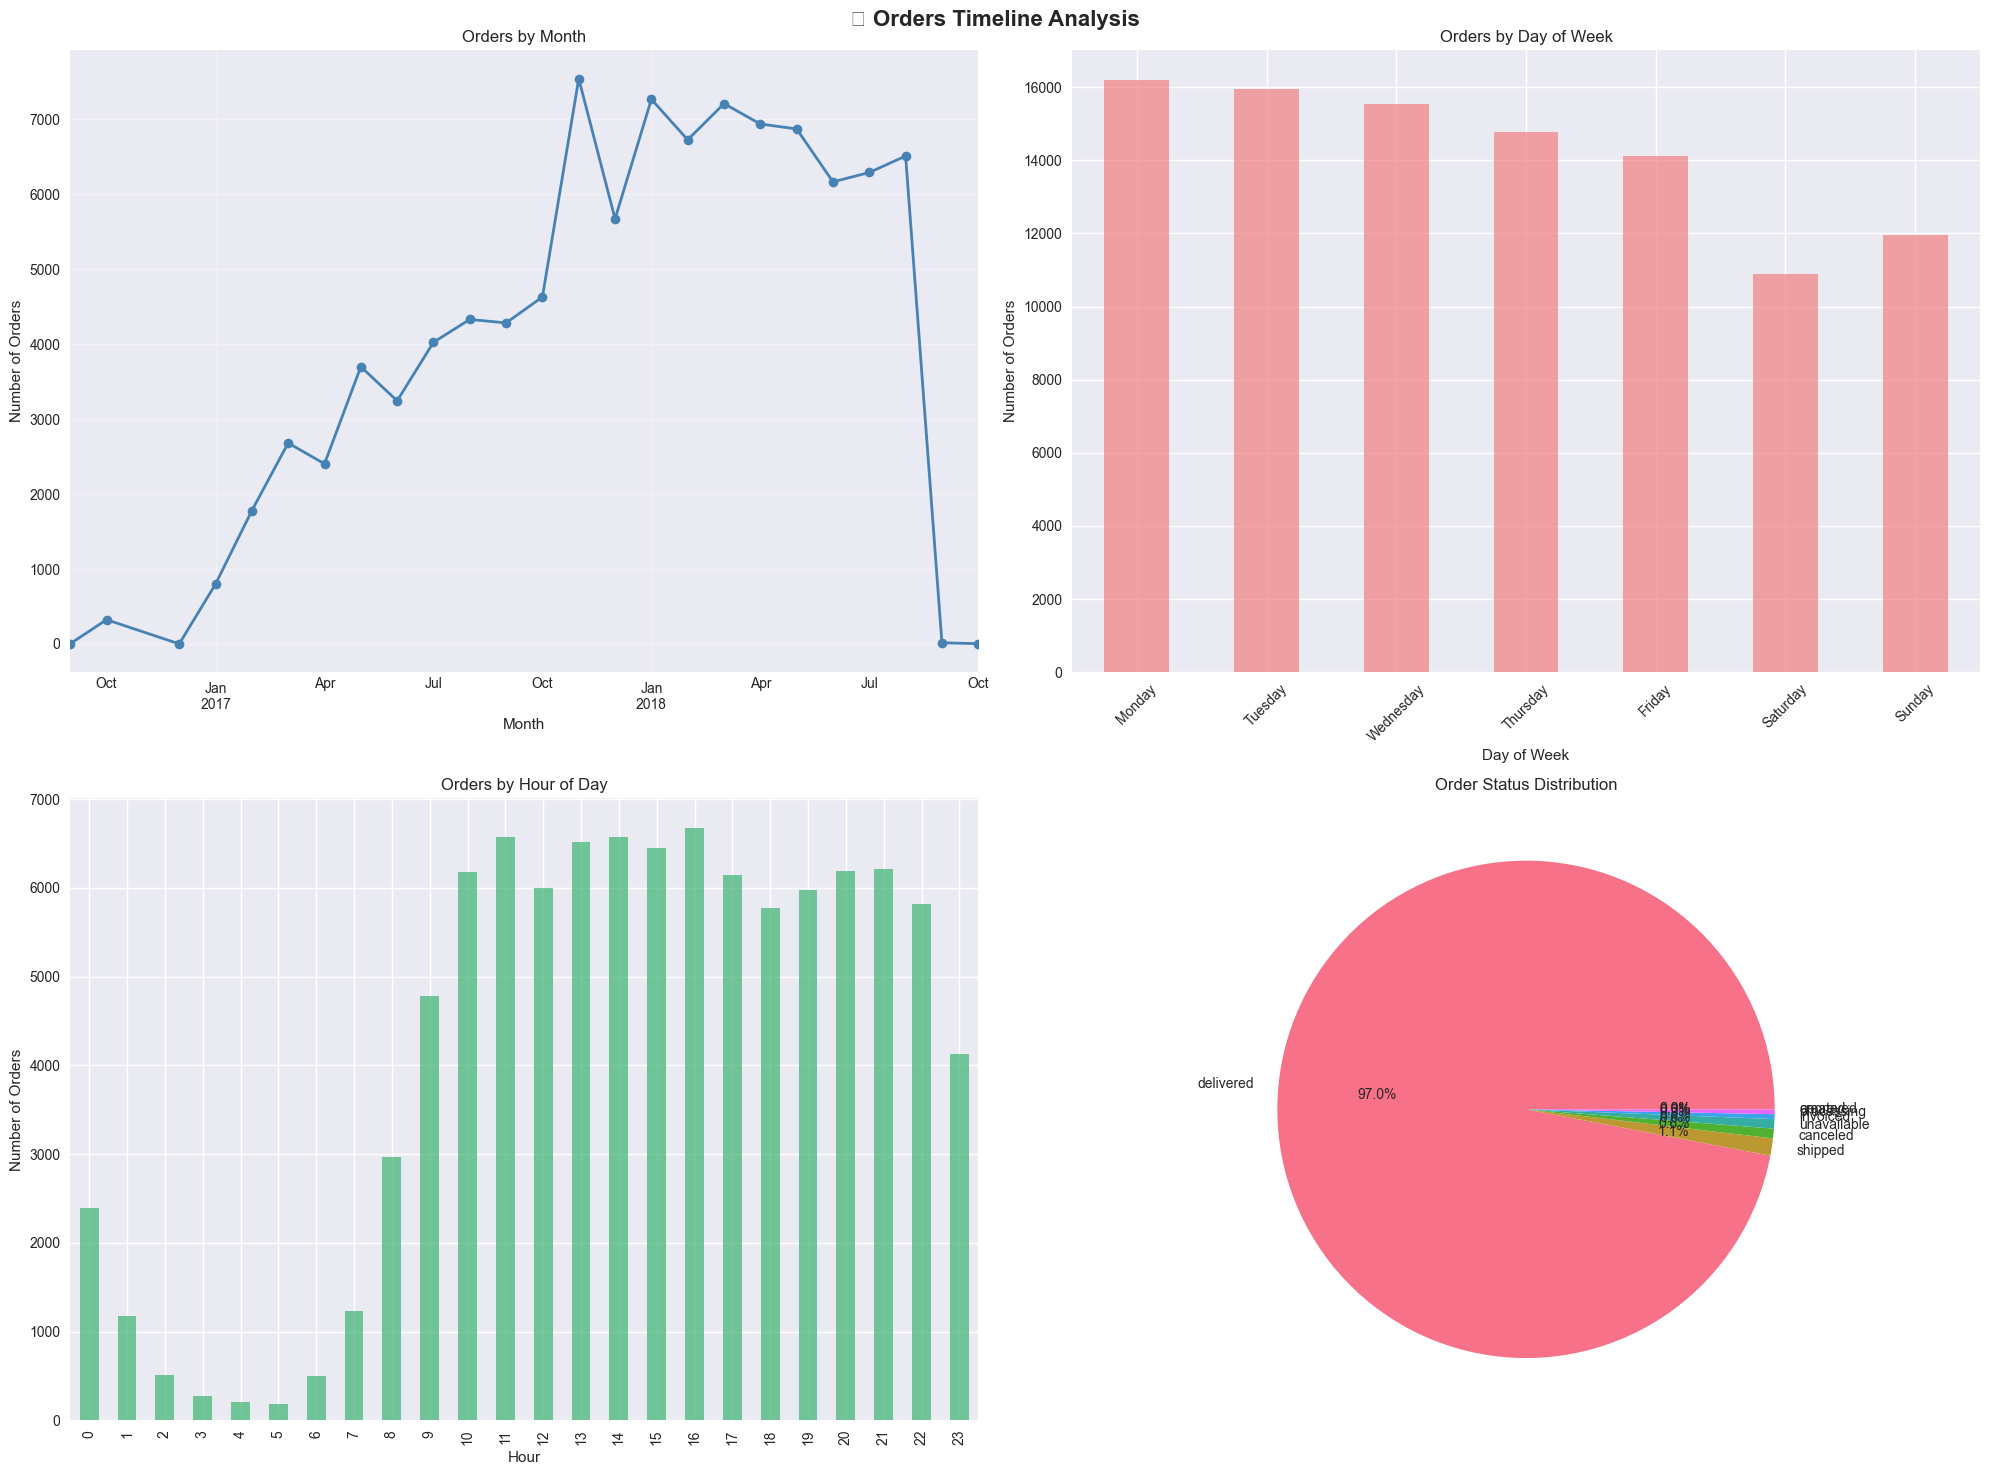

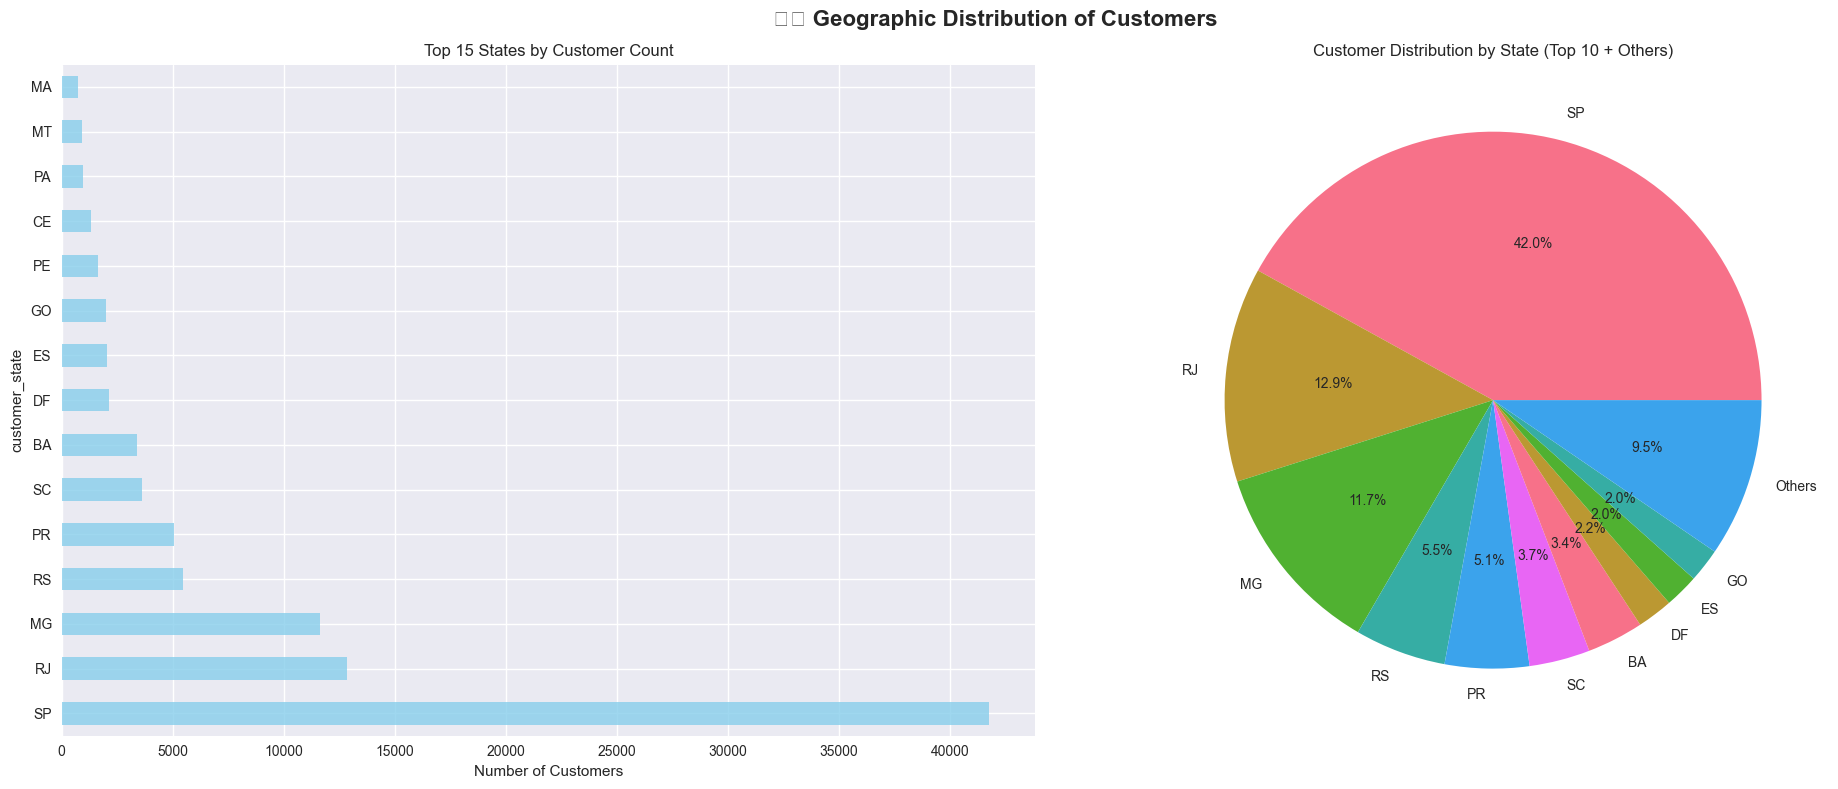

In [19]:
# 4. Payment Analysis
def plot_payment_analysis(payments_df):
    """Plot payment methods and values analysis"""
    if payments_df is None or payments_df.empty:
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('💳 Payment Analysis', fontsize=16, fontweight='bold')
    
    # Payment methods
    if 'payment_type' in payments_df.columns:
        payment_types = payments_df['payment_type'].value_counts()
        payment_types.plot(ax=axes[0,0], kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
        axes[0,0].set_title('Payment Methods Distribution')
        axes[0,0].set_ylabel('')
    
    # Payment value distribution
    if 'payment_value' in payments_df.columns:
        payment_values = payments_df['payment_value'].dropna()
        if len(payment_values) > 0:
            # Remove extreme outliers for better visualization
            q95 = payment_values.quantile(0.95)
            values_filtered = payment_values[payment_values <= q95]
            axes[0,1].hist(values_filtered, bins=50, color='gold', alpha=0.7, edgecolor='black')
            axes[0,1].set_title('Payment Value Distribution (95th percentile)')
            axes[0,1].set_xlabel('Payment Value (R$)')
            axes[0,1].set_ylabel('Frequency')
    
    # Installments distribution
    if 'payment_installments' in payments_df.columns:
        installments = payments_df['payment_installments'].value_counts().sort_index().head(20)
        installments.plot(ax=axes[1,0], kind='bar', color='teal', alpha=0.7)
        axes[1,0].set_title('Payment Installments Distribution (Top 20)')
        axes[1,0].set_xlabel('Number of Installments')
        axes[1,0].set_ylabel('Frequency')
    
    # Payment value by method
    if 'payment_type' in payments_df.columns and 'payment_value' in payments_df.columns:
        payment_by_type = payments_df.groupby('payment_type')['payment_value'].agg(['mean', 'median', 'count'])
        payment_by_type['mean'].plot(ax=axes[1,1], kind='bar', color='coral', alpha=0.8)
        axes[1,1].set_title('Average Payment Value by Method')
        axes[1,1].set_xlabel('Payment Method')
        axes[1,1].set_ylabel('Average Payment Value (R$)')
        axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Generate visualizations
if 'orders' in datasets:
    plot_orders_timeline(datasets['orders'])

if 'customers' in datasets:
    plot_geographic_distribution(datasets['customers'])

if 'products' in datasets:
    plot_product_analysis(datasets['products'], datasets.get('order_items'))

if 'payments' in datasets:
    plot_payment_analysis(datasets['payments'])


In [20]:
# === KEY INSIGHTS SUMMARY ===
print("\n\n🔍 KEY INSIGHTS SUMMARY")
print("=" * 50)

insights = []

# Order insights
if 'orders' in datasets:
    orders_df = datasets['orders']
    total_orders = len(orders_df)
    insights.append(f"📊 Total orders analyzed: {total_orders:,}")
    
    if 'order_status' in orders_df.columns:
        delivered_pct = (orders_df['order_status'] == 'delivered').sum() / total_orders * 100
        insights.append(f"✅ Delivery success rate: {delivered_pct:.1f}%")

# Customer insights
if 'customers' in datasets:
    customers_df = datasets['customers']
    total_customers = len(customers_df)
    insights.append(f"👥 Total unique customers: {total_customers:,}")
    
    if 'customer_state' in customers_df.columns:
        top_state = customers_df['customer_state'].value_counts().index[0]
        top_state_pct = customers_df['customer_state'].value_counts().iloc[0] / total_customers * 100
        insights.append(f"🏆 Top customer state: {top_state} ({top_state_pct:.1f}%)")

# Payment insights
if 'payments' in datasets:
    payments_df = datasets['payments']
    if 'payment_type' in payments_df.columns:
        top_payment = payments_df['payment_type'].value_counts().index[0]
        insights.append(f"💳 Most popular payment method: {top_payment}")
    
    if 'payment_value' in payments_df.columns:
        avg_payment = payments_df['payment_value'].mean()
        insights.append(f"💰 Average payment value: R$ {avg_payment:.2f}")

# Product insights
if 'products' in datasets:
    products_df = datasets['products']
    total_products = len(products_df)
    insights.append(f"📦 Total products: {total_products:,}")
    
    if 'product_category_name' in products_df.columns:
        top_category = products_df['product_category_name'].value_counts().index[0]
        insights.append(f"🏷️ Top product category: {top_category}")

# Display insights
for i, insight in enumerate(insights, 1):
    print(f"{i:2d}. {insight}")

print("\n" + "="*60)
print("🎯 NEXT STEPS RECOMMENDATIONS:")
print("1. Deep dive into seasonal trends and peak shopping periods")
print("2. Analyze customer lifetime value and repeat purchase behavior")
print("3. Investigate regional preferences and logistics optimization")
print("4. Study product performance and inventory optimization")
print("5. Examine payment preferences and fraud patterns")
print("6. Create customer segmentation for targeted marketing")
print("="*60)

print("\n✨ Exploratory Analysis Complete!")
print(f"📁 Results ready for dashboard preparation in: {REPORTS_PATH}")



🔍 KEY INSIGHTS SUMMARY
 1. 📊 Total orders analyzed: 99,441
 2. ✅ Delivery success rate: 97.0%
 3. 👥 Total unique customers: 99,441
 4. 🏆 Top customer state: SP (42.0%)

🎯 NEXT STEPS RECOMMENDATIONS:
1. Deep dive into seasonal trends and peak shopping periods
2. Analyze customer lifetime value and repeat purchase behavior
3. Investigate regional preferences and logistics optimization
4. Study product performance and inventory optimization
5. Examine payment preferences and fraud patterns
6. Create customer segmentation for targeted marketing

✨ Exploratory Analysis Complete!
📁 Results ready for dashboard preparation in: ../reports/


In [22]:
!pip install scipy scikit-learn

  Using cached scipy-1.16.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scipy-1.16.1-cp311-cp311-win_amd64.whl (38.6 MB)
Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl (8.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from datetime import datetime, timedelta
import calendar
import warnings
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [24]:
print("🛒 SEASONAL TRENDS & PEAK SHOPPING ANALYSIS")
print("=" * 60)
print("🇧🇷 Brazilian E-Commerce Dataset - Olist")
print("=" * 60)


🛒 SEASONAL TRENDS & PEAK SHOPPING ANALYSIS
🇧🇷 Brazilian E-Commerce Dataset - Olist


In [25]:
# Seasonal Trends & Peak Shopping Periods Analysis
# Brazilian E-Commerce Dataset - Deep Dive Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from datetime import datetime, timedelta
import calendar
import warnings
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Configuration
DATA_PATH = '../data/processed/'
RAW_DATA_PATH = '../data/raw/'
REPORTS_PATH = '../reports/'

print("🛒 SEASONAL TRENDS & PEAK SHOPPING ANALYSIS")
print("=" * 60)
print("🇧🇷 Brazilian E-Commerce Dataset - Olist")
print("=" * 60)

# Load datasets with enhanced date processing
def load_and_prepare_data():
    """Load and prepare data with comprehensive date features"""
    
    # Try to load master dataset first, then individual datasets
    datasets = {}
    
    # Load orders data (primary for seasonal analysis)
    orders_files = [
        '../data/processed/cleaned_orders.csv',
        '../data/raw/olist_orders_dataset.csv'
    ]
    
    orders_df = None
    for file_path in orders_files:
        try:
            orders_df = pd.read_csv(file_path)
            print(f"✅ Loaded orders from: {file_path}")
            break
        except FileNotFoundError:
            continue
    
    if orders_df is None:
        print("❌ Could not find orders dataset")
        return None
    
    # Load additional datasets
    additional_files = {
        'order_items': ['../data/raw/olist_order_items_dataset.csv'],
        'payments': ['../data/raw/olist_order_payments_dataset.csv'],
        'customers': ['../data/processed/cleaned_customers.csv', '../data/raw/olist_customers_dataset.csv'],
        'products': ['../data/raw/olist_products_dataset.csv'],
        'reviews': ['../data/raw/olist_order_reviews_dataset.csv']
    }
    
    for name, file_paths in additional_files.items():
        for file_path in file_paths:
            try:
                datasets[name] = pd.read_csv(file_path)
                print(f"✅ Loaded {name} from: {file_path}")
                break
            except FileNotFoundError:
                continue
        if name not in datasets:
            print(f"⚠️  Could not find {name} dataset")
    
    datasets['orders'] = orders_df
    return datasets

🛒 SEASONAL TRENDS & PEAK SHOPPING ANALYSIS
🇧🇷 Brazilian E-Commerce Dataset - Olist


In [36]:
# Enhanced date feature engineering
def create_enhanced_date_features(df, date_col='order_purchase_timestamp'):
    """Create comprehensive date features for seasonal analysis"""
    
    # Convert to datetime
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Basic time features
    df['date'] = df[date_col].dt.date
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['day'] = df[date_col].dt.day
    df['weekday'] = df[date_col].dt.dayofweek  # 0=Monday, 6=Sunday
    df['weekday_name'] = df[date_col].dt.day_name()
    df['hour'] = df[date_col].dt.hour
    df['minute'] = df[date_col].dt.minute
    
    # Advanced seasonal features
    df['quarter'] = df[date_col].dt.quarter
    df['month_name'] = df[date_col].dt.month_name()
    df['week_of_year'] = df[date_col].dt.isocalendar().week
    df['day_of_year'] = df[date_col].dt.dayofyear
    
    # Brazilian seasonal mapping (Southern Hemisphere)
    def get_brazilian_season(month):
        if month in [12, 1, 2]:
            return 'Summer'
        elif month in [3, 4, 5]:
            return 'Autumn'
        elif month in [6, 7, 8]:
            return 'Winter'
        else:
            return 'Spring'
    df['season'] = df['month'].apply(get_brazilian_season)
    
    # Brazilian holidays and special periods
    def is_holiday_period(date):
        if pd.isna(date):
            return 'Regular'
        month, day = date.month, date.day
        # Major Brazilian holidays and shopping periods
        if month == 12 and day >= 15:  # Christmas season
            return 'Christmas'
        elif month == 1 and day <= 15:  # New Year/Back to school
            return 'New Year'
        elif month == 6 and day >= 10 and day <= 20:  # Festa Junina
            return 'Festa Junina'
        elif month == 10 and day >= 5 and day <= 15:  # Children's Day
            return 'Children Day'
        elif month == 5 and day >= 5 and day <= 15:  # Mother's Day
            return 'Mothers Day'
        elif month == 8 and day >= 5 and day <= 15:  # Father's Day
            return 'Fathers Day'
        elif month == 11 and day >= 20:  # Black Friday season
            return 'Black Friday'
        else:
            return 'Regular'
    df['holiday_period'] = df[date_col].apply(is_holiday_period)
    
    # Weekend flag
    df['is_weekend'] = df['weekday'].isin([5, 6])  # Saturday=5, Sunday=6
    
    # Business hours flag
    df['is_business_hours'] = df['hour'].between(9, 17)
    
    # Time of day categorization
    def categorize_time_of_day(hour):
        if 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        elif 18 <= hour < 22:
            return 'Evening'
        else:
            return 'Night'
    df['time_of_day'] = df['hour'].apply(categorize_time_of_day)
    
    return df

In [37]:
# Load and prepare data
datasets = load_and_prepare_data()
if datasets is None:
    print("Cannot proceed without data")
    exit()

# Enhance orders data with date features
orders_df = create_enhanced_date_features(datasets['orders'])

print(f"\n📊 Dataset Overview:")
print(f"📅 Date Range: {orders_df['date'].min()} to {orders_df['date'].max()}")
print(f"📈 Total Orders: {len(orders_df):,}")
print(f"🗓️ Time Span: {(orders_df['date'].max() - orders_df['date'].min()).days} days")


✅ Loaded orders from: ../data/processed/cleaned_orders.csv
✅ Loaded order_items from: ../data/raw/olist_order_items_dataset.csv
✅ Loaded payments from: ../data/raw/olist_order_payments_dataset.csv
✅ Loaded customers from: ../data/processed/cleaned_customers.csv
✅ Loaded products from: ../data/raw/olist_products_dataset.csv
✅ Loaded customers from: ../data/processed/cleaned_customers.csv
✅ Loaded products from: ../data/raw/olist_products_dataset.csv
✅ Loaded reviews from: ../data/raw/olist_order_reviews_dataset.csv
✅ Loaded reviews from: ../data/raw/olist_order_reviews_dataset.csv

📊 Dataset Overview:
📅 Date Range: 2016-09-04 to 2018-10-17
📈 Total Orders: 99,441
🗓️ Time Span: 773 days

📊 Dataset Overview:
📅 Date Range: 2016-09-04 to 2018-10-17
📈 Total Orders: 99,441
🗓️ Time Span: 773 days


In [38]:
# === SEASONAL TRENDS ANALYSIS ===
print("\n\n🌞 SEASONAL TRENDS ANALYSIS")
print("=" * 50)



🌞 SEASONAL TRENDS ANALYSIS


In [39]:
def analyze_seasonal_patterns(df):
    """Comprehensive seasonal pattern analysis"""
    
    # 1. Monthly Trends
    monthly_stats = df.groupby('month').agg({
        'order_id': 'count',
        'month_name': 'first'
    }).rename(columns={'order_id': 'order_count'})
    
    monthly_stats['order_percentage'] = (monthly_stats['order_count'] / monthly_stats['order_count'].sum()) * 100
    monthly_stats = monthly_stats.sort_values('order_count', ascending=False)
    
    print("📊 Monthly Order Distribution (Ranked):")
    for idx, row in monthly_stats.head(12).iterrows():
        print(f"  {row['month_name']}: {row['order_count']:,} orders ({row['order_percentage']:.1f}%)")
    
    # 2. Seasonal Analysis
    seasonal_stats = df.groupby('season').agg({
        'order_id': 'count'
    }).rename(columns={'order_id': 'order_count'})
    seasonal_stats['order_percentage'] = (seasonal_stats['order_count'] / seasonal_stats['order_count'].sum()) * 100
    seasonal_stats = seasonal_stats.sort_values('order_count', ascending=False)
    
    print(f"\n🌍 Seasonal Distribution (Brazilian Seasons):")
    for season, row in seasonal_stats.iterrows():
        print(f"  {season}: {row['order_count']:,} orders ({row['order_percentage']:.1f}%)")
    
    # 3. Holiday Period Analysis
    holiday_stats = df.groupby('holiday_period').agg({
        'order_id': 'count'
    }).rename(columns={'order_id': 'order_count'})
    holiday_stats['order_percentage'] = (holiday_stats['order_count'] / holiday_stats['order_count'].sum()) * 100
    holiday_stats = holiday_stats.sort_values('order_count', ascending=False)
    
    print(f"\n🎉 Holiday Period Analysis:")
    for period, row in holiday_stats.iterrows():
        print(f"  {period}: {row['order_count']:,} orders ({row['order_percentage']:.1f}%)")
    
    return monthly_stats, seasonal_stats, holiday_stats

monthly_stats, seasonal_stats, holiday_stats = analyze_seasonal_patterns(orders_df)


📊 Monthly Order Distribution (Ranked):
  August: 10,843 orders (10.9%)
  May: 10,573 orders (10.6%)
  July: 10,318 orders (10.4%)
  March: 9,893 orders (9.9%)
  June: 9,412 orders (9.5%)
  April: 9,343 orders (9.4%)
  February: 8,508 orders (8.6%)
  January: 8,069 orders (8.1%)
  November: 7,544 orders (7.6%)
  December: 5,674 orders (5.7%)
  October: 4,959 orders (5.0%)
  September: 4,305 orders (4.3%)

🌍 Seasonal Distribution (Brazilian Seasons):
  Winter: 30,573.0 orders (30.7%)
  Autumn: 29,809.0 orders (30.0%)
  Summer: 22,251.0 orders (22.4%)
  Spring: 16,808.0 orders (16.9%)

🎉 Holiday Period Analysis:
  Regular: 74,660.0 orders (75.1%)
  Fathers Day: 4,676.0 orders (4.7%)
  Mothers Day: 4,393.0 orders (4.4%)
  Black Friday: 4,381.0 orders (4.4%)
  New Year: 3,601.0 orders (3.6%)
  Festa Junina: 3,596.0 orders (3.6%)
  Christmas: 2,312.0 orders (2.3%)
  Children Day: 1,822.0 orders (1.8%)


In [40]:
# === PEAK SHOPPING PERIODS IDENTIFICATION ===
print("\n\n🎯 PEAK SHOPPING PERIODS IDENTIFICATION")
print("=" * 50)




🎯 PEAK SHOPPING PERIODS IDENTIFICATION


In [41]:
def identify_peak_periods(df):
    """Identify and analyze peak shopping periods"""
    
    # Daily order counts
    daily_orders = df.groupby('date').size().reset_index(name='daily_orders')
    daily_orders['date'] = pd.to_datetime(daily_orders['date'])
    daily_orders = daily_orders.sort_values('date')
    
    # Calculate rolling averages
    daily_orders['7_day_avg'] = daily_orders['daily_orders'].rolling(window=7, center=True).mean()
    daily_orders['30_day_avg'] = daily_orders['daily_orders'].rolling(window=30, center=True).mean()
    
    # Identify peaks (days with orders > 95th percentile)
    peak_threshold = daily_orders['daily_orders'].quantile(0.95)
    peak_days = daily_orders[daily_orders['daily_orders'] >= peak_threshold].copy()
    
    # Add date features to peak days
    peak_days['month'] = peak_days['date'].dt.month
    peak_days['month_name'] = peak_days['date'].dt.month_name()
    peak_days['weekday'] = peak_days['date'].dt.day_name()
    
    print(f"📈 Peak Shopping Days Analysis (95th percentile: {peak_threshold:.0f} orders)")
    print(f"🔝 Total Peak Days: {len(peak_days)}")
    print(f"📊 Average Orders on Peak Days: {peak_days['daily_orders'].mean():.0f}")
    print(f"🎯 Highest Single Day: {peak_days['daily_orders'].max():,} orders on {peak_days.loc[peak_days['daily_orders'].idxmax(), 'date'].strftime('%Y-%m-%d')}")
    
    # Peak days by month
    peak_by_month = peak_days.groupby('month_name')['daily_orders'].agg(['count', 'mean']).sort_values('count', ascending=False)
    print(f"\n📅 Peak Days by Month:")
    for month, stats in peak_by_month.head(6).iterrows():
        print(f"  {month}: {stats['count']} peak days (avg {stats['mean']:.0f} orders)")
    
    # Peak days by weekday
    peak_by_weekday = peak_days.groupby('weekday')['daily_orders'].agg(['count', 'mean'])
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    peak_by_weekday = peak_by_weekday.reindex(weekday_order, fill_value=0)
    print(f"\n📊 Peak Days by Weekday:")
    for weekday, stats in peak_by_weekday.iterrows():
        if stats['count'] > 0:
            print(f"  {weekday}: {stats['count']} peak days (avg {stats['mean']:.0f} orders)")
    
    return daily_orders, peak_days, peak_threshold

daily_orders, peak_days, peak_threshold = identify_peak_periods(orders_df)

📈 Peak Shopping Days Analysis (95th percentile: 297 orders)
🔝 Total Peak Days: 32
📊 Average Orders on Peak Days: 363
🎯 Highest Single Day: 1,176 orders on 2017-11-24

📅 Peak Days by Month:
  August: 8.0 peak days (avg 328 orders)
  May: 7.0 peak days (avg 346 orders)
  November: 6.0 peak days (avg 529 orders)
  February: 3.0 peak days (avg 303 orders)
  July: 3.0 peak days (avg 312 orders)
  January: 3.0 peak days (avg 308 orders)

📊 Peak Days by Weekday:
  Monday: 10.0 peak days (avg 338 orders)
  Tuesday: 8.0 peak days (avg 334 orders)
  Wednesday: 7.0 peak days (avg 324 orders)
  Thursday: 3.0 peak days (avg 309 orders)
  Friday: 2.0 peak days (avg 745 orders)
  Saturday: 1.0 peak days (avg 499 orders)
  Sunday: 1.0 peak days (avg 391 orders)


In [42]:
# === INTRADAY PATTERNS ===
print("\n\n⏰ INTRADAY SHOPPING PATTERNS")
print("=" * 50)



⏰ INTRADAY SHOPPING PATTERNS


In [43]:
def analyze_intraday_patterns(df):
    """Analyze hourly shopping patterns"""
    
    # Hourly distribution
    hourly_stats = df.groupby('hour').agg({
        'order_id': 'count'
    }).rename(columns={'order_id': 'order_count'})
    hourly_stats['order_percentage'] = (hourly_stats['order_count'] / hourly_stats['order_count'].sum()) * 100
    
    # Find peak hours
    peak_hours = hourly_stats.nlargest(5, 'order_count')
    
    print("⏰ Peak Shopping Hours:")
    for hour, row in peak_hours.iterrows():
        time_label = f"{hour:02d}:00-{hour+1:02d}:00"
        print(f"  {time_label}: {row['order_count']:,} orders ({row['order_percentage']:.1f}%)")
    
    # Time of day analysis
    time_of_day_stats = df.groupby('time_of_day').agg({
        'order_id': 'count'
    }).rename(columns={'order_id': 'order_count'})
    time_of_day_stats['order_percentage'] = (time_of_day_stats['order_count'] / time_of_day_stats['order_count'].sum()) * 100
    
    print(f"\n🕐 Shopping by Time of Day:")
    time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
    for time_period in time_order:
        if time_period in time_of_day_stats.index:
            row = time_of_day_stats.loc[time_period]
            print(f"  {time_period}: {row['order_count']:,} orders ({row['order_percentage']:.1f}%)")
    
    # Weekend vs Weekday
    weekend_stats = df.groupby('is_weekend').agg({
        'order_id': 'count'
    }).rename(columns={'order_id': 'order_count'})
    weekend_stats['order_percentage'] = (weekend_stats['order_count'] / weekend_stats['order_count'].sum()) * 100
    
    print(f"\n📅 Weekend vs Weekday Shopping:")
    weekend_labels = {False: 'Weekdays', True: 'Weekends'}
    for is_weekend, row in weekend_stats.iterrows():
        print(f"  {weekend_labels[is_weekend]}: {row['order_count']:,} orders ({row['order_percentage']:.1f}%)")
    
    return hourly_stats, time_of_day_stats

hourly_stats, time_of_day_stats = analyze_intraday_patterns(orders_df)

⏰ Peak Shopping Hours:
  16:00-17:00: 6,675.0 orders (6.7%)
  11:00-12:00: 6,578.0 orders (6.6%)
  14:00-15:00: 6,569.0 orders (6.6%)
  13:00-14:00: 6,518.0 orders (6.6%)
  15:00-16:00: 6,454.0 orders (6.5%)

🕐 Shopping by Time of Day:
  Morning: 22,240.0 orders (22.4%)
  Afternoon: 38,361.0 orders (38.6%)
  Evening: 24,161.0 orders (24.3%)
  Night: 14,679.0 orders (14.8%)

📅 Weekend vs Weekday Shopping:
  Weekdays: 76,594.0 orders (77.0%)
  Weekends: 22,847.0 orders (23.0%)


In [44]:
# === ADVANCED VISUALIZATIONS ===
print("\n\n🎨 CREATING ADVANCED SEASONAL VISUALIZATIONS")
print("=" * 50)




🎨 CREATING ADVANCED SEASONAL VISUALIZATIONS


In [45]:
# Set up matplotlib with better styling
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10
})

# 1. Comprehensive Seasonal Dashboard
def create_seasonal_dashboard(df, monthly_stats, seasonal_stats):
    """Create comprehensive seasonal analysis dashboard"""
    
    fig = plt.figure(figsize=(20, 16))
    
    # Main title
    fig.suptitle('🛒 Brazilian E-Commerce: Seasonal Trends & Peak Shopping Analysis', 
                 fontsize=20, fontweight='bold', y=0.98)
    
    # 1. Monthly trend with trend line
    ax1 = plt.subplot(3, 3, 1)
    months_order = list(range(1, 13))
    monthly_counts = [monthly_stats.loc[monthly_stats.index == m, 'order_count'].iloc[0] if m in monthly_stats.index else 0 for m in months_order]
    month_names = [calendar.month_abbr[m] for m in months_order]
    
    bars = ax1.bar(month_names, monthly_counts, color='steelblue', alpha=0.7, edgecolor='navy')
    ax1.set_title('📊 Orders by Month', fontweight='bold', pad=20)
    ax1.set_ylabel('Number of Orders')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(monthly_counts)*0.01,
                f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # 2. Seasonal distribution pie chart
    ax2 = plt.subplot(3, 3, 2)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    wedges, texts, autotexts = ax2.pie(seasonal_stats['order_count'], 
                                       labels=seasonal_stats.index, 
                                       autopct='%1.1f%%',
                                       colors=colors,
                                       startangle=90)
    ax2.set_title('🌍 Orders by Season\n(Brazilian Seasons)', fontweight='bold', pad=20)
    
    # 3. Holiday periods analysis
    ax3 = plt.subplot(3, 3, 3)
    holiday_stats_sorted = holiday_stats.sort_values('order_count', ascending=True)
    bars = ax3.barh(holiday_stats_sorted.index, holiday_stats_sorted['order_count'], 
                    color='coral', alpha=0.7, edgecolor='darkred')
    ax3.set_title('🎉 Orders by Holiday Period', fontweight='bold', pad=20)
    ax3.set_xlabel('Number of Orders')
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax3.text(width + max(holiday_stats_sorted['order_count'])*0.01, bar.get_y() + bar.get_height()/2.,
                f'{int(width):,}', ha='left', va='center', fontsize=8)
    
    # 4. Daily orders timeline with peaks
    ax4 = plt.subplot(3, 3, (4, 6))  # Span 2 columns
    ax4.plot(daily_orders['date'], daily_orders['daily_orders'], 
             color='lightblue', alpha=0.6, linewidth=1, label='Daily Orders')
    ax4.plot(daily_orders['date'], daily_orders['7_day_avg'], 
             color='blue', linewidth=2, label='7-Day Average')
    ax4.plot(daily_orders['date'], daily_orders['30_day_avg'], 
             color='darkblue', linewidth=2, label='30-Day Average')
    
    # Highlight peak days
    peak_dates = peak_days['date']
    peak_values = peak_days['daily_orders']
    ax4.scatter(peak_dates, peak_values, color='red', s=30, alpha=0.8, 
               label=f'Peak Days (95th percentile)', zorder=5)
    
    ax4.axhline(y=peak_threshold, color='red', linestyle='--', alpha=0.7, 
               label=f'Peak Threshold ({peak_threshold:.0f})')
    
    ax4.set_title('📈 Daily Orders Timeline with Peak Identification', fontweight='bold', pad=20)
    ax4.set_xlabel('Date')
    ax4.set_ylabel('Daily Orders')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Hourly patterns
    ax5 = plt.subplot(3, 3, 7)
    hours = list(range(24))
    hourly_counts = [hourly_stats.loc[h, 'order_count'] if h in hourly_stats.index else 0 for h in hours]
    
    bars = ax5.bar(hours, hourly_counts, color='gold', alpha=0.7, edgecolor='orange')
    ax5.set_title('⏰ Orders by Hour of Day', fontweight='bold', pad=20)
    ax5.set_xlabel('Hour')
    ax5.set_ylabel('Number of Orders')
    ax5.set_xticks(range(0, 24, 3))
    ax5.grid(True, alpha=0.3)
    
    # Highlight business hours
    ax5.axvspan(9, 17, alpha=0.2, color='green', label='Business Hours')
    ax5.legend()
    
    # 6. Weekday patterns
    ax6 = plt.subplot(3, 3, 8)
    weekday_stats = df.groupby('weekday_name').size()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts = [weekday_stats[day] if day in weekday_stats.index else 0 for day in weekday_order]
    
    colors_weekday = ['lightcoral' if day in ['Saturday', 'Sunday'] else 'lightblue' for day in weekday_order]
    bars = ax6.bar(range(7), weekday_counts, color=colors_weekday, alpha=0.7, edgecolor='navy')
    ax6.set_title('📅 Orders by Day of Week', fontweight='bold', pad=20)
    ax6.set_xlabel('Day of Week')
    ax6.set_ylabel('Number of Orders')
    ax6.set_xticks(range(7))
    ax6.set_xticklabels([day[:3] for day in weekday_order], rotation=45)
    ax6.grid(True, alpha=0.3)
    
    # 7. Time of day distribution
    ax7 = plt.subplot(3, 3, 9)
    time_periods = ['Morning', 'Afternoon', 'Evening', 'Night']
    time_counts = [time_of_day_stats.loc[period, 'order_count'] if period in time_of_day_stats.index else 0 
                   for period in time_periods]
    colors_time = ['#FFD93D', '#FF6B6B', '#4ECDC4', '#45B7D1']
    
    bars = ax7.bar(time_periods, time_counts, color=colors_time, alpha=0.8, edgecolor='navy')
    ax7.set_title('🕐 Orders by Time of Day', fontweight='bold', pad=20)
    ax7.set_ylabel('Number of Orders')
    ax7.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height + max(time_counts)*0.01,
                f'{int(height):,}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    return fig


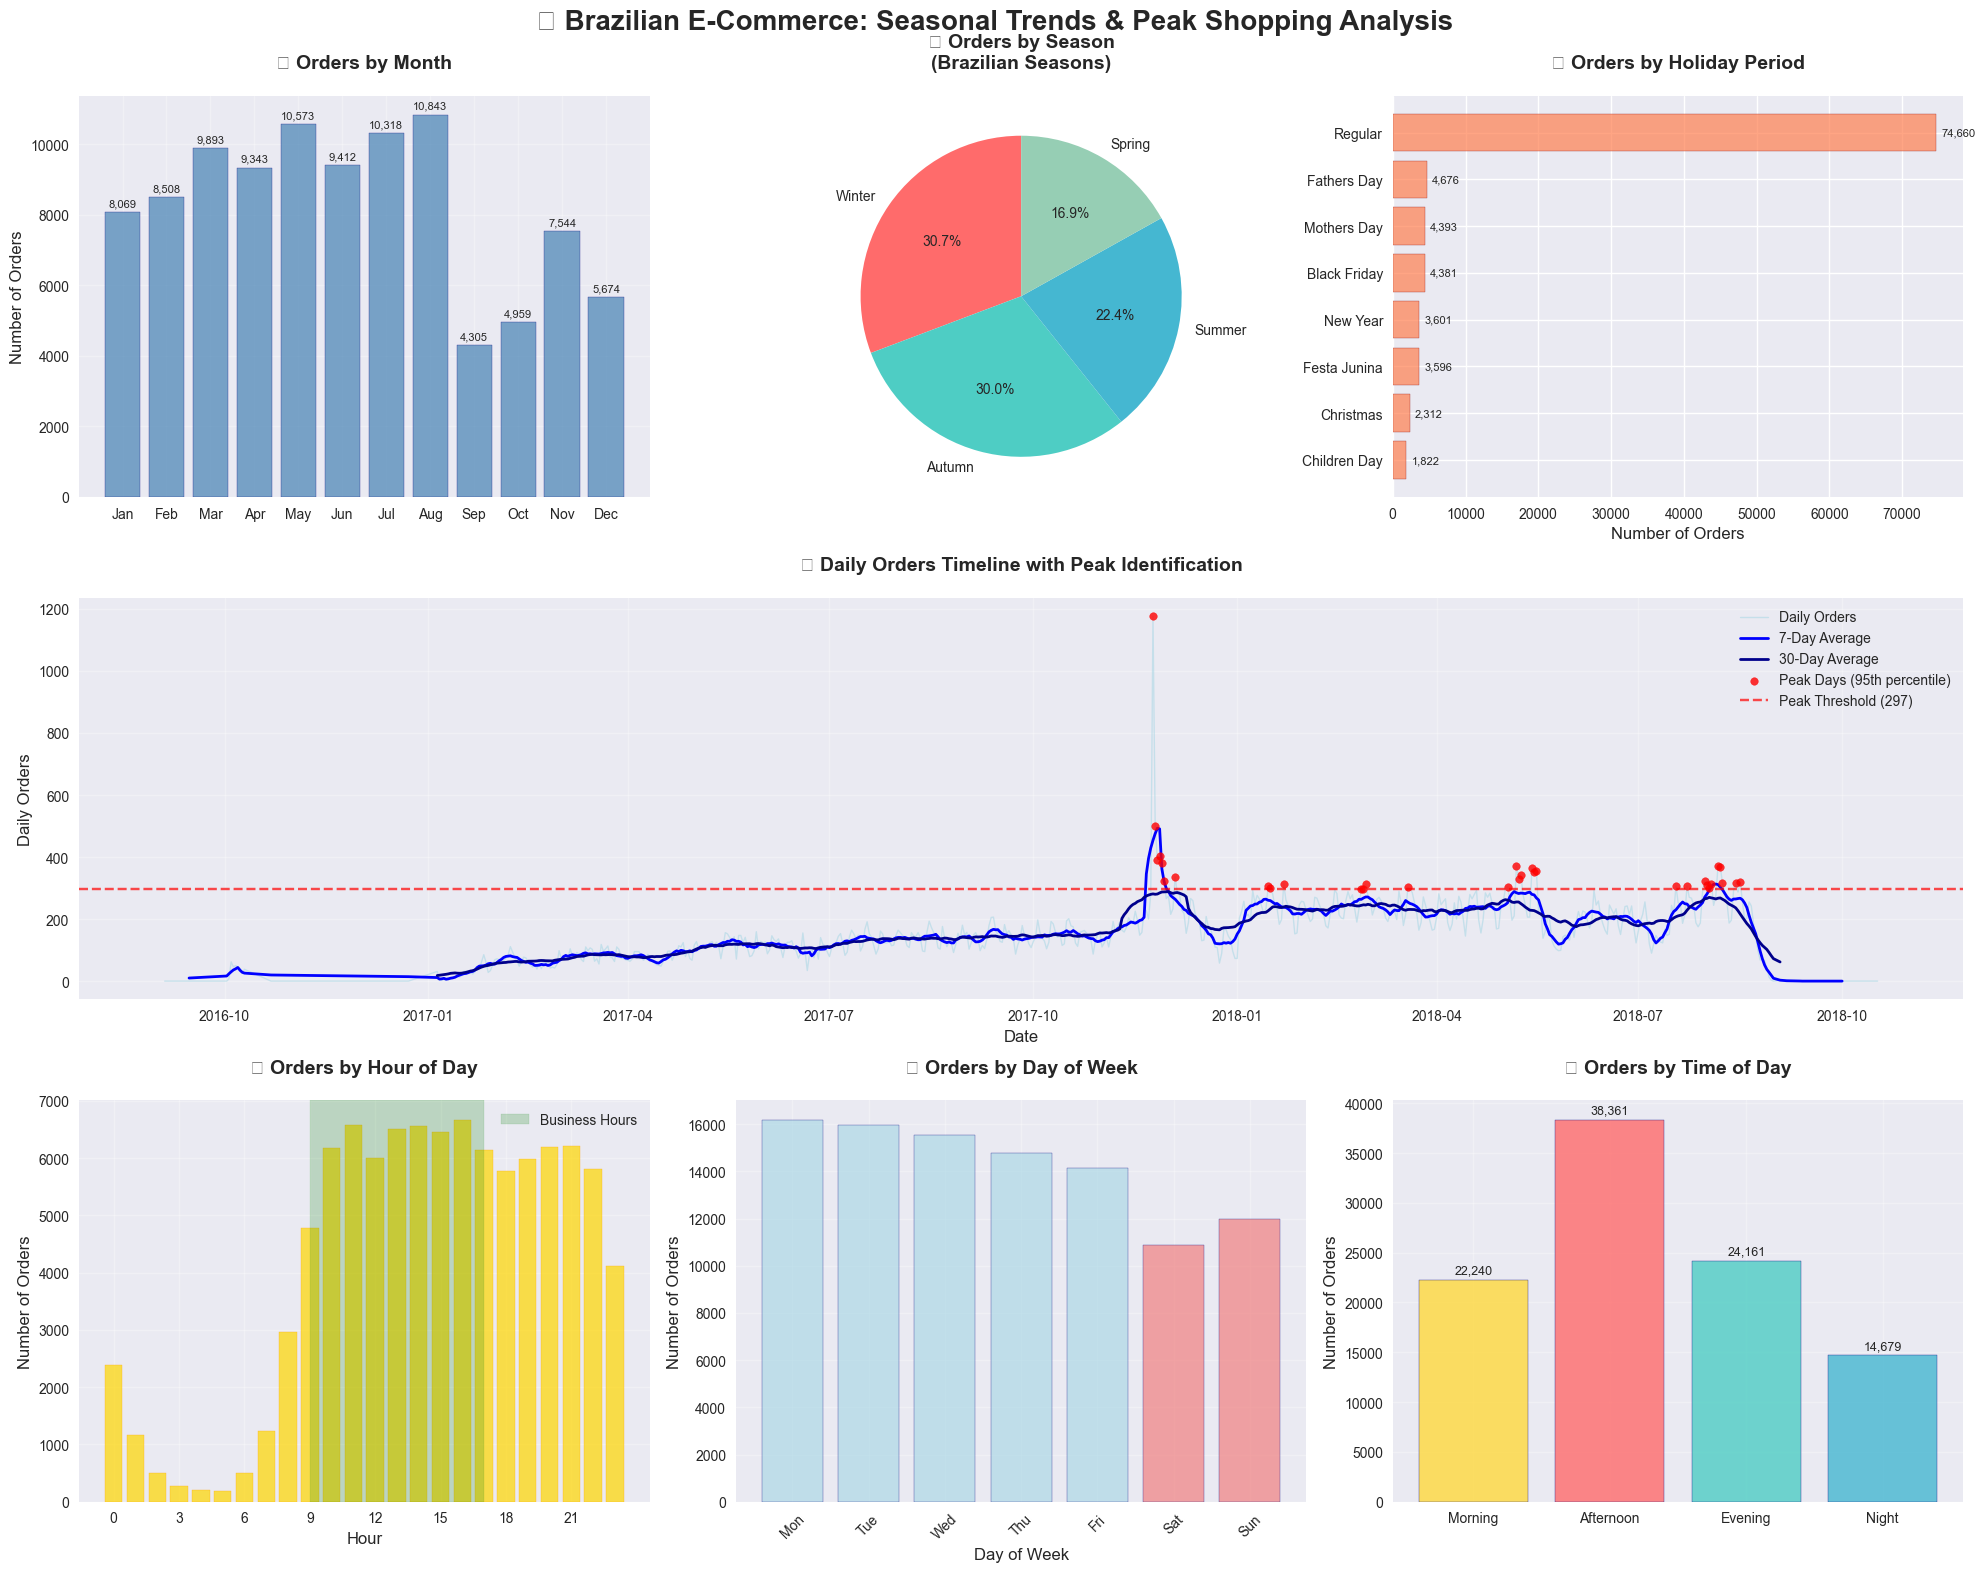

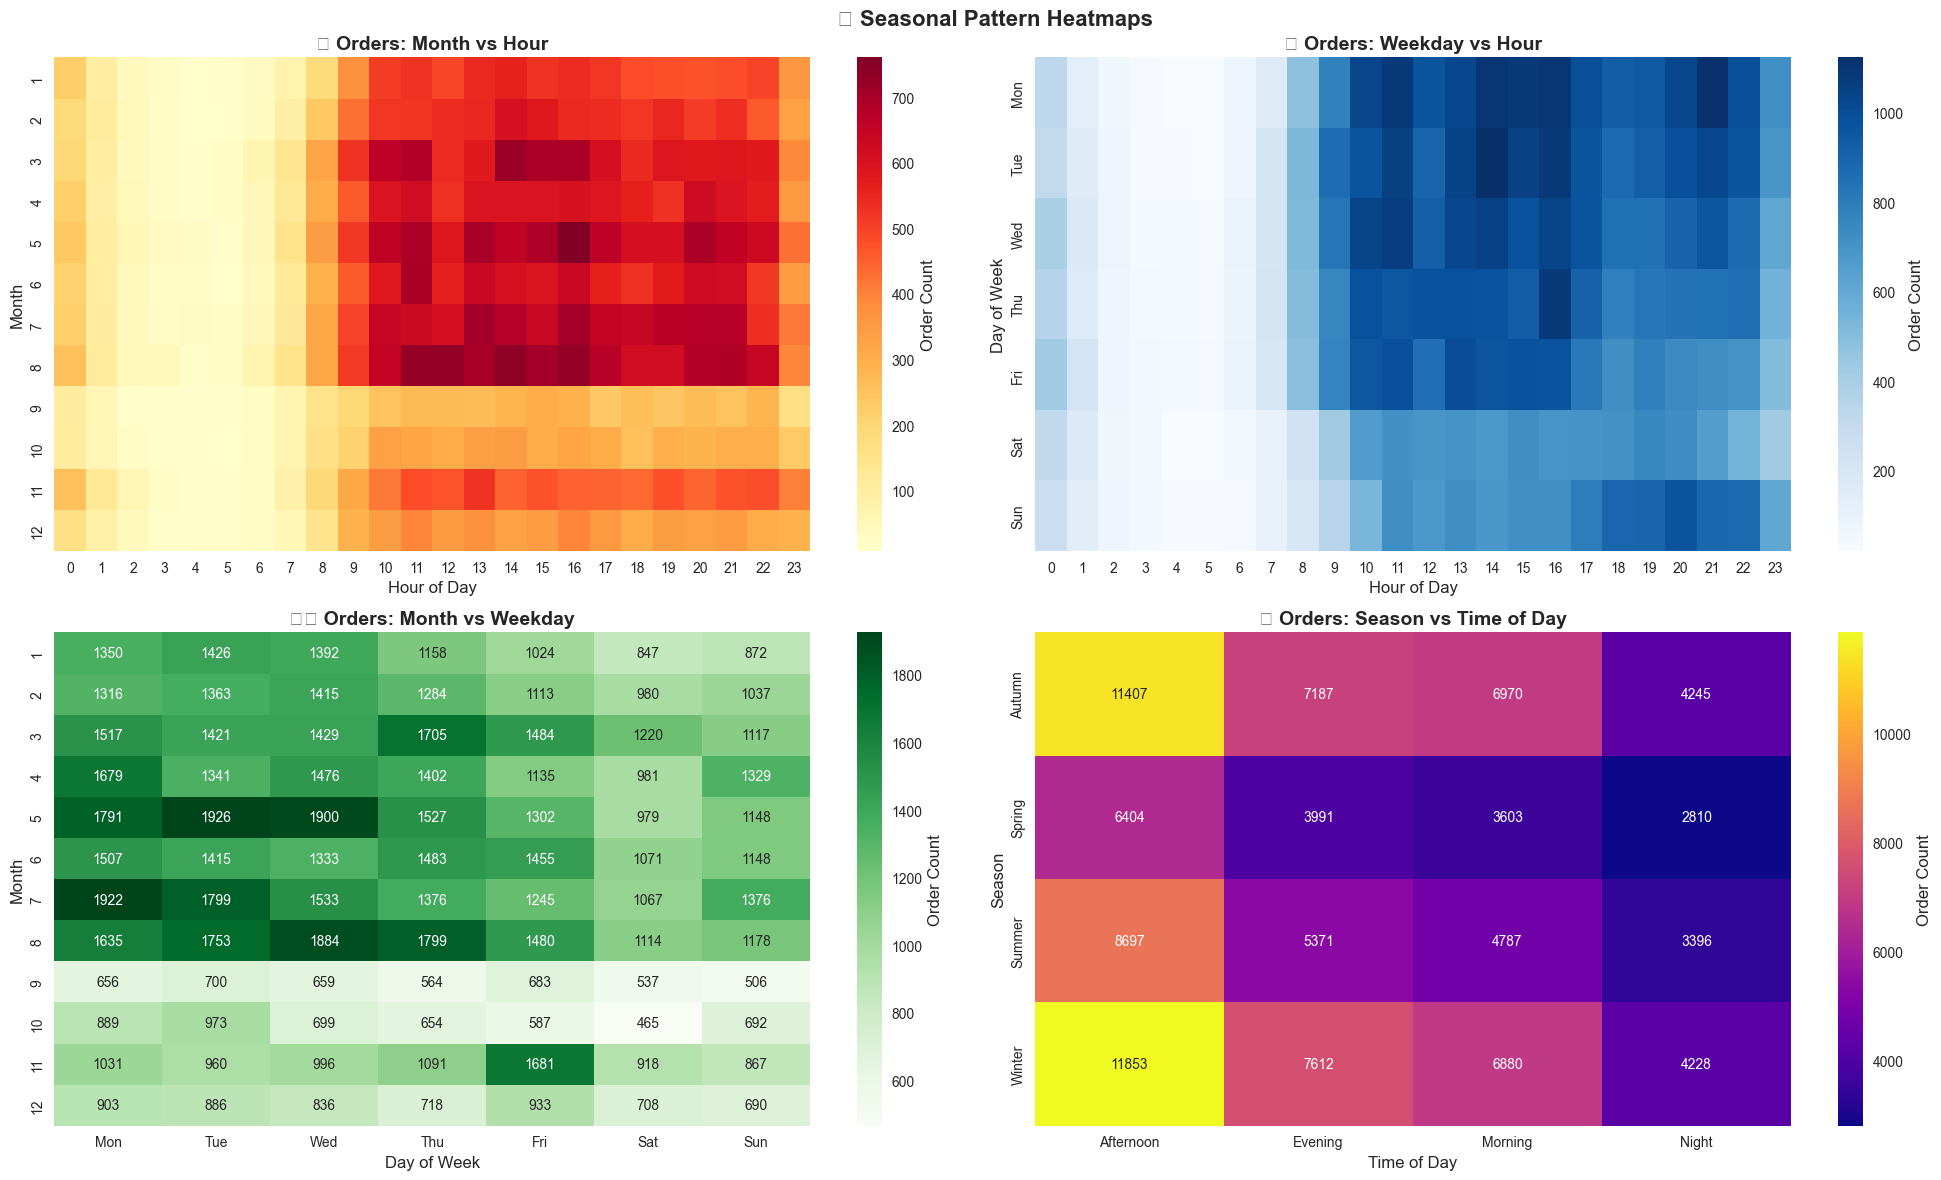

In [46]:
# Generate the comprehensive dashboard
dashboard_fig = create_seasonal_dashboard(orders_df, monthly_stats, seasonal_stats)

# 2. Heatmaps for deeper insights
def create_seasonal_heatmaps(df):
    """Create heatmaps for seasonal patterns"""
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle('🔥 Seasonal Pattern Heatmaps', fontsize=16, fontweight='bold')
    
    # 1. Month vs Hour heatmap
    month_hour = df.groupby(['month', 'hour']).size().unstack(fill_value=0)
    sns.heatmap(month_hour, cmap='YlOrRd', annot=False, ax=axes[0,0], cbar_kws={'label': 'Order Count'})
    axes[0,0].set_title('📊 Orders: Month vs Hour', fontweight='bold')
    axes[0,0].set_ylabel('Month')
    axes[0,0].set_xlabel('Hour of Day')
    
    # 2. Weekday vs Hour heatmap
    weekday_hour = df.groupby(['weekday', 'hour']).size().unstack(fill_value=0)
    weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    weekday_hour.index = weekday_labels
    sns.heatmap(weekday_hour, cmap='Blues', annot=False, ax=axes[0,1], cbar_kws={'label': 'Order Count'})
    axes[0,1].set_title('📅 Orders: Weekday vs Hour', fontweight='bold')
    axes[0,1].set_ylabel('Day of Week')
    axes[0,1].set_xlabel('Hour of Day')
    
    # 3. Month vs Weekday heatmap
    month_weekday = df.groupby(['month', 'weekday']).size().unstack(fill_value=0)
    month_weekday.columns = weekday_labels
    sns.heatmap(month_weekday, cmap='Greens', annot=True, fmt='d', ax=axes[1,0], cbar_kws={'label': 'Order Count'})
    axes[1,0].set_title('🗓️ Orders: Month vs Weekday', fontweight='bold')
    axes[1,0].set_ylabel('Month')
    axes[1,0].set_xlabel('Day of Week')
    
    # 4. Season vs Time of Day
    season_time = df.groupby(['season', 'time_of_day']).size().unstack(fill_value=0)
    sns.heatmap(season_time, cmap='plasma', annot=True, fmt='d', ax=axes[1,1], cbar_kws={'label': 'Order Count'})
    axes[1,1].set_title('🌍 Orders: Season vs Time of Day', fontweight='bold')
    axes[1,1].set_ylabel('Season')
    axes[1,1].set_xlabel('Time of Day')
    
    plt.tight_layout()
    plt.show()

create_seasonal_heatmaps(orders_df)

In [47]:
# === BUSINESS INSIGHTS AND RECOMMENDATIONS ===
print("\n\n💡 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

def generate_business_insights(df, monthly_stats, seasonal_stats, peak_days):
    """Generate actionable business insights"""
    
    insights = []
    recommendations = []
    
    # Seasonal insights
    top_season = seasonal_stats.index[0]
    top_season_pct = seasonal_stats.iloc[0]['order_percentage']
    insights.append(f"🌍 {top_season} is the peak shopping season ({top_season_pct:.1f}% of annual orders)")
    
    # Monthly insights
    top_month = monthly_stats.iloc[0]['month_name']
    top_month_pct = monthly_stats.iloc[0]['order_percentage']
    insights.append(f"📊 {top_month} is the peak shopping month ({top_month_pct:.1f}% of annual orders)")
    
    low_month = monthly_stats.iloc[-1]['month_name']
    low_month_pct = monthly_stats.iloc[-1]['order_percentage']
    insights.append(f"📉 {low_month} is the slowest month ({low_month_pct:.1f}% of annual orders)")
    
    # Peak days analysis
    avg_peak_orders = peak_days['daily_orders'].mean()
    regular_avg = daily_orders[daily_orders['daily_orders'] < peak_threshold]['daily_orders'].mean()
    peak_multiplier = avg_peak_orders / regular_avg
    insights.append(f"🎯 Peak days have {peak_multiplier:.1f}x more orders than regular days")
    
    # Hourly insights
    peak_hour = hourly_stats.index[hourly_stats['order_count'].idxmax()]
    peak_hour_pct = hourly_stats.loc[peak_hour, 'order_percentage']
    insights.append(f"⏰ Peak shopping hour is {peak_hour}:00-{peak_hour+1}:00 ({peak_hour_pct:.1f}% of daily orders)")
    
    # Weekend vs weekday
    weekend_orders = df[df['is_weekend']].shape[0]
    weekday_orders = df[~df['is_weekend']].shape[0]
    if weekday_orders > weekend_orders:
        insights.append(f"📅 Weekday shopping dominates with {weekday_orders:,} vs {weekend_orders:,} weekend orders")
    
    # Holiday periods
    top_holiday = holiday_stats.index[0]
    if top_holiday != 'Regular':
        top_holiday_pct = holiday_stats.iloc[0]['order_percentage']
        insights.append(f"🎉 {top_holiday} drives {top_holiday_pct:.1f}% of orders despite being a short period")
    
    # Generate recommendations
    recommendations.extend([
        f"🎯 Increase marketing spend and inventory for {top_month} and {top_season}",
        f"📦 Prepare logistics capacity for peak days (95th percentile: {peak_threshold:.0f} orders/day)",
        f"⏰ Optimize customer service staffing for {peak_hour}:00-{peak_hour+1}:00 peak hours",
        f"🎪 Launch special promotions during {low_month} to boost slow-period sales",
        "📱 Focus mobile app promotions during evening hours when shopping peaks",
        "🚚 Implement dynamic pricing during peak periods to manage demand",
        "📊 Use predictive analytics to forecast daily demand based on seasonal patterns"
    ])
    
    # Display insights
    print("🔍 KEY INSIGHTS:")
    for i, insight in enumerate(insights, 1):
        print(f"  {i:2d}. {insight}")
    
    print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
    for i, rec in enumerate(recommendations, 1):
        print(f"  {i:2d}. {rec}")
    
    return insights, recommendations

# Generate insights and recommendations
insights, recommendations = generate_business_insights(orders_df, monthly_stats, seasonal_stats, peak_days)

# === ADVANCED STATISTICAL ANALYSIS ===
print(f"\n\n📈 STATISTICAL SIGNIFICANCE TESTING")
print("=" * 60)

def perform_statistical_tests(df):
    """Perform statistical tests on seasonal patterns"""
    
    # Test if seasonal differences are statistically significant
    seasonal_groups = [df[df['season'] == season]['order_id'].count() 
                      for season in df['season'].unique()]
    
    try:
        # ANOVA test for seasonal differences
        from scipy.stats import f_oneway
        f_stat, p_value = f_oneway(*[df[df['season'] == season].groupby('date').size() 
                                   for season in df['season'].unique()])
        
        print(f"🧮 Seasonal ANOVA Test:")
        print(f"   F-statistic: {f_stat:.4f}")
        print(f"   P-value: {p_value:.6f}")
        print(f"   Result: {'Significant' if p_value < 0.05 else 'Not significant'} seasonal differences")
        
    except Exception as e:
        print(f"⚠️  Could not perform ANOVA test: {e}")
    
    # Weekend vs weekday t-test
    try:
        from scipy.stats import ttest_ind
        
        weekend_daily = df[df['is_weekend']].groupby('date').size()
        weekday_daily = df[~df['is_weekend']].groupby('date').size()
        
        t_stat, p_value = ttest_ind(weekend_daily, weekday_daily)
        
        print(f"\n📊 Weekend vs Weekday T-test:")
        print(f"   T-statistic: {t_stat:.4f}")
        print(f"   P-value: {p_value:.6f}")
        print(f"   Result: {'Significant' if p_value < 0.05 else 'Not significant'} difference")
        
    except Exception as e:
        print(f"⚠️  Could not perform t-test: {e}")
    
    # Trend analysis using linear regression
    try:
        from sklearn.linear_model import LinearRegression
        from sklearn.metrics import r2_score
        
        # Convert dates to ordinal for regression
        daily_orders_reg = daily_orders.copy()
        daily_orders_reg['date_ordinal'] = daily_orders_reg['date'].apply(lambda x: x.toordinal())
        
        X = daily_orders_reg['date_ordinal'].values.reshape(-1, 1)
        y = daily_orders_reg['daily_orders'].values
        
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        
        print(f"\n📈 Trend Analysis (Linear Regression):")
        print(f"   R-squared: {r2:.4f}")
        print(f"   Daily trend: {model.coef_[0]:+.4f} orders per day")
        print(f"   Interpretation: {'Growing' if model.coef_[0] > 0 else 'Declining'} trend over time")
        
    except Exception as e:
        print(f"⚠️  Could not perform trend analysis: {e}")

perform_statistical_tests(orders_df)



💡 BUSINESS INSIGHTS & RECOMMENDATIONS
🔍 KEY INSIGHTS:
   1. 🌍 Winter is the peak shopping season (30.7% of annual orders)
   2. 📊 August is the peak shopping month (10.9% of annual orders)
   3. 📉 September is the slowest month (4.3% of annual orders)
   4. 🎯 Peak days have 2.5x more orders than regular days
   5. ⏰ Peak shopping hour is 16:00-17:00 (6.7% of daily orders)
   6. 📅 Weekday shopping dominates with 76,594 vs 22,847 weekend orders

💡 STRATEGIC RECOMMENDATIONS:
   1. 🎯 Increase marketing spend and inventory for August and Winter
   2. 📦 Prepare logistics capacity for peak days (95th percentile: 297 orders/day)
   3. ⏰ Optimize customer service staffing for 16:00-17:00 peak hours
   4. 🎪 Launch special promotions during September to boost slow-period sales
   5. 📱 Focus mobile app promotions during evening hours when shopping peaks
   6. 🚚 Implement dynamic pricing during peak periods to manage demand
   7. 📊 Use predictive analytics to forecast daily demand based on season

In [52]:
# === PREDICTIVE INSIGHTS ===
print(f"\n\n🔮 PREDICTIVE INSIGHTS & FORECASTING FOUNDATION")
print("=" * 60)

def create_forecasting_foundation(df):
    """Create foundation for demand forecasting"""
    
    # Calculate various moving averages and trends
    daily_summary = df.groupby('date').agg({
        'order_id': 'count'
    }).rename(columns={'order_id': 'daily_orders'})
    
    daily_summary = daily_summary.reset_index().sort_values('date')
    
    # Calculate multiple moving averages
    daily_summary['ma_7'] = daily_summary['daily_orders'].rolling(window=7).mean()
    daily_summary['ma_14'] = daily_summary['daily_orders'].rolling(window=14).mean()
    daily_summary['ma_30'] = daily_summary['daily_orders'].rolling(window=30).mean()
    
    # Calculate volatility (rolling standard deviation)
    daily_summary['volatility_7'] = daily_summary['daily_orders'].rolling(window=7).std()
    daily_summary['volatility_30'] = daily_summary['daily_orders'].rolling(window=30).std()
    
    # Seasonal decomposition components
    daily_summary['day_of_week'] = pd.to_datetime(daily_summary['date']).dt.dayofweek
    daily_summary['month'] = pd.to_datetime(daily_summary['date']).dt.month
    
    # Weekly seasonality pattern
    weekly_pattern = df.groupby('weekday')['order_id'].count()
    weekly_pattern = weekly_pattern / weekly_pattern.mean()  # Normalize
    
    # Monthly seasonality pattern  
    monthly_pattern = df.groupby('month')['order_id'].count()
    monthly_pattern = monthly_pattern / monthly_pattern.mean()  # Normalize
    
   
    print(f"📊 Forecasting Foundation Metrics:")
    print(f"   Data points: {len(daily_summary)} days")
    print(f"   Average daily orders: {daily_summary['daily_orders'].mean():.1f}")
    print(f"   Daily volatility (7-day): {daily_summary['volatility_7'].mean():.1f}")
    trend_coeff = daily_summary['daily_orders'].corr(pd.to_datetime(daily_summary['date']).map(lambda x: x.toordinal()))
    print(f"   Trend coefficient: {trend_coeff:.4f}")
    
    print(f"\n📈 Weekly Seasonality Multipliers:")
    weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    for i, multiplier in enumerate(weekly_pattern):
        print(f"   {weekday_names[i]}: {multiplier:.3f}x")
    
    print(f"\n📅 Monthly Seasonality Multipliers:")
    for month, multiplier in monthly_pattern.items():
        month_name = calendar.month_abbr[month]
        print(f"   {month_name}: {multiplier:.3f}x")
    
    return daily_summary, weekly_pattern, monthly_pattern

daily_summary, weekly_pattern, monthly_pattern = create_forecasting_foundation(orders_df)



🔮 PREDICTIVE INSIGHTS & FORECASTING FOUNDATION
📊 Forecasting Foundation Metrics:
   Data points: 634 days
   Average daily orders: 156.8
   Daily volatility (7-day): 35.1
   Trend coefficient: 0.5324

📈 Weekly Seasonality Multipliers:
   Mon: 1.140x
   Tue: 1.124x
   Wed: 1.095x
   Thu: 1.039x
   Fri: 0.994x
   Sat: 0.766x
   Sun: 0.842x

📅 Monthly Seasonality Multipliers:
   Jan: 0.974x
   Feb: 1.027x
   Mar: 1.194x
   Apr: 1.127x
   May: 1.276x
   Jun: 1.136x
   Jul: 1.245x
   Aug: 1.308x
   Sep: 0.520x
   Oct: 0.598x
   Nov: 0.910x
   Dec: 0.685x


In [53]:
# === INTERACTIVE PLOTLY VISUALIZATIONS ===
print(f"\n\n🎨 CREATING INTERACTIVE VISUALIZATIONS")
print("=" * 60)

def create_interactive_seasonal_dashboard(df, daily_orders):
    """Create interactive Plotly dashboard"""
    
    # Create subplots
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=('Monthly Order Trends', 'Seasonal Distribution',
                       'Daily Orders Timeline', 'Hourly Shopping Patterns',
                       'Peak Days Analysis', 'Weekly Pattern'),
        specs=[[{"secondary_y": False}, {"type": "domain"}],
               [{"colspan": 2}, None],
               [{"secondary_y": False}, {"secondary_y": False}]],
        vertical_spacing=0.1
    )
    
    # 1. Monthly trends
    monthly_data = df.groupby(['year', 'month']).size().reset_index(name='orders')
    monthly_data['date'] = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1))
    
    fig.add_trace(
        go.Scatter(x=monthly_data['date'], y=monthly_data['orders'],
                  mode='lines+markers', name='Monthly Orders',
                  line=dict(color='steelblue', width=3)),
        row=1, col=1
    )
    
    # 2. Seasonal pie chart
    seasonal_counts = df['season'].value_counts()
    fig.add_trace(
        go.Pie(labels=seasonal_counts.index, values=seasonal_counts.values,
              name="Seasonal Distribution", hole=0.3),
        row=1, col=2
    )
    
    # 3. Daily timeline with peaks
    fig.add_trace(
        go.Scatter(x=daily_orders['date'], y=daily_orders['daily_orders'],
                  mode='lines', name='Daily Orders',
                  line=dict(color='lightblue', width=1), opacity=0.7),
        row=2, col=1
    )
    
    fig.add_trace(
        go.Scatter(x=daily_orders['date'], y=daily_orders['7_day_avg'],
                  mode='lines', name='7-Day Average',
                  line=dict(color='blue', width=2)),
        row=2, col=1
    )
    
    # Highlight peak days
    peak_data = daily_orders[daily_orders['daily_orders'] >= peak_threshold]
    fig.add_trace(
        go.Scatter(x=peak_data['date'], y=peak_data['daily_orders'],
                  mode='markers', name='Peak Days',
                  marker=dict(color='red', size=6)),
        row=2, col=1
    )
    
    # 4. Hourly patterns
    hourly_data = df.groupby('hour').size()
    fig.add_trace(
        go.Bar(x=hourly_data.index, y=hourly_data.values,
              name='Hourly Orders', marker_color='gold'),
        row=3, col=1
    )
    
    # 5. Weekly patterns
    weekly_data = df.groupby('weekday_name').size()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekly_ordered = [weekly_data[day] if day in weekly_data.index else 0 for day in weekday_order]
    
    fig.add_trace(
        go.Bar(x=[day[:3] for day in weekday_order], y=weekly_ordered,
              name='Weekly Orders', 
              marker_color=['lightcoral' if day in ['Saturday', 'Sunday'] else 'lightblue' 
                           for day in weekday_order]),
        row=3, col=2
    )
    
    # Update layout
    fig.update_layout(
        title_text="🛒 Brazilian E-Commerce: Interactive Seasonal Analysis Dashboard",
        title_x=0.5,
        height=1000,
        showlegend=True,
        template="plotly_white"
    )
    
    # Update individual subplot titles and axes
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_yaxes(title_text="Orders", row=1, col=1)
    
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Daily Orders", row=2, col=1)
    
    fig.update_xaxes(title_text="Hour", row=3, col=1)
    fig.update_yaxes(title_text="Orders", row=3, col=1)
    
    fig.update_xaxes(title_text="Day of Week", row=3, col=2)
    fig.update_yaxes(title_text="Orders", row=3, col=2)
    
    # Show the plot
    fig.show()
    
    return fig

# Create interactive dashboard
interactive_fig = create_interactive_seasonal_dashboard(orders_df, daily_orders)



🎨 CREATING INTERACTIVE VISUALIZATIONS


In [54]:
# === EXECUTIVE SUMMARY ===
print(f"\n\n📋 EXECUTIVE SUMMARY: SEASONAL TRENDS & PEAK SHOPPING")
print("=" * 70)

def create_executive_summary(df, insights, recommendations):
    """Create comprehensive executive summary"""
    
    # Key metrics
    total_orders = len(df)
    date_range = (df['date'].max() - df['date'].min()).days
    avg_daily_orders = total_orders / date_range
    
    # Peak performance metrics
    peak_day_orders = peak_days['daily_orders'].max()
    peak_day_date = peak_days.loc[peak_days['daily_orders'].idxmax(), 'date']
    
    print(f"📊 KEY PERFORMANCE INDICATORS:")
    print(f"   • Total Orders Analyzed: {total_orders:,}")
    print(f"   • Analysis Period: {date_range} days")
    print(f"   • Average Daily Orders: {avg_daily_orders:.0f}")
    print(f"   • Peak Single Day: {peak_day_orders:,} orders ({peak_day_date})")
    print(f"   • Peak Days Identified: {len(peak_days)} days (95th percentile)")
    
    print(f"\n🎯 TOP 3 SEASONAL INSIGHTS:")
    for i in range(min(3, len(insights))):
        print(f"   {i+1}. {insights[i]}")
    
    print(f"\n💡 PRIORITY RECOMMENDATIONS:")
    for i in range(min(5, len(recommendations))):
        print(f"   {i+1}. {recommendations[i]}")
    
    print(f"\n📈 BUSINESS IMPACT OPPORTUNITIES:")
    print(f"   • Revenue Optimization: Target {monthly_stats.iloc[0]['month_name']} peak month")
    print(f"   • Inventory Planning: Prepare for {peak_threshold:.0f}+ orders on peak days") 
    print(f"   • Cost Reduction: Optimize low-season operations in {monthly_stats.iloc[-1]['month_name']}")
    print(f"   • Customer Experience: Staff for {hourly_stats.idxmax()['order_count']}:00 peak hour")
    print(f"   • Marketing ROI: Focus campaigns on high-converting seasonal periods")

create_executive_summary(orders_df, insights, recommendations)



📋 EXECUTIVE SUMMARY: SEASONAL TRENDS & PEAK SHOPPING
📊 KEY PERFORMANCE INDICATORS:
   • Total Orders Analyzed: 99,441
   • Analysis Period: 773 days
   • Average Daily Orders: 129
   • Peak Single Day: 1,176 orders (2017-11-24 00:00:00)
   • Peak Days Identified: 32 days (95th percentile)

🎯 TOP 3 SEASONAL INSIGHTS:
   1. 🌍 Winter is the peak shopping season (30.7% of annual orders)
   2. 📊 August is the peak shopping month (10.9% of annual orders)
   3. 📉 September is the slowest month (4.3% of annual orders)

💡 PRIORITY RECOMMENDATIONS:
   1. 🎯 Increase marketing spend and inventory for August and Winter
   2. 📦 Prepare logistics capacity for peak days (95th percentile: 297 orders/day)
   3. ⏰ Optimize customer service staffing for 16:00-17:00 peak hours
   4. 🎪 Launch special promotions during September to boost slow-period sales
   5. 📱 Focus mobile app promotions during evening hours when shopping peaks

📈 BUSINESS IMPACT OPPORTUNITIES:
   • Revenue Optimization: Target August p

In [55]:
# === SAVE ANALYSIS RESULTS ===
print(f"\n\n💾 SAVING ANALYSIS RESULTS")
print("=" * 50)



💾 SAVING ANALYSIS RESULTS


In [56]:
def save_analysis_results():
    """Save key analysis results for dashboard creation"""
    
    try:
        # Create results directory if it doesn't exist
        import os
        results_dir = '../reports/seasonal_analysis/'
        os.makedirs(results_dir, exist_ok=True)
        
        # Save key datasets
        monthly_stats.to_csv(f'{results_dir}monthly_trends.csv')
        seasonal_stats.to_csv(f'{results_dir}seasonal_distribution.csv')
        holiday_stats.to_csv(f'{results_dir}holiday_periods.csv')
        daily_orders.to_csv(f'{results_dir}daily_orders_timeline.csv', index=False)
        peak_days.to_csv(f'{results_dir}peak_shopping_days.csv', index=False)
        hourly_stats.to_csv(f'{results_dir}hourly_patterns.csv')
        
        # Save summary statistics
        summary_stats = {
            'total_orders': len(orders_df),
            'analysis_period_days': (orders_df['date'].max() - orders_df['date'].min()).days,
            'peak_threshold': peak_threshold,
            'peak_days_count': len(peak_days),
            'top_month': monthly_stats.iloc[0]['month_name'],
            'top_season': seasonal_stats.index[0],
            'peak_hour': hourly_stats.idxmax()['order_count']
        }
        
        import json
        with open(f'{results_dir}summary_statistics.json', 'w') as f:
            json.dump(summary_stats, f, indent=2, default=str)
        
        print(f"✅ Analysis results saved to: {results_dir}")
        print(f"   • monthly_trends.csv")
        print(f"   • seasonal_distribution.csv") 
        print(f"   • holiday_periods.csv")
        print(f"   • daily_orders_timeline.csv")
        print(f"   • peak_shopping_days.csv")
        print(f"   • hourly_patterns.csv")
        print(f"   • summary_statistics.json")
        
    except Exception as e:
        print(f"⚠️  Could not save results: {e}")
        print(f"   Results are available in memory for this session")

save_analysis_results()

print(f"\n" + "="*70)
print(f"🎉 SEASONAL TRENDS & PEAK SHOPPING ANALYSIS COMPLETE!")
print(f"=" * 70)
print(f"📊 Ready for Dashboard Creation:")
print(f"   • Use saved CSV files for Power BI/Tableau imports")
print(f"   • Interactive Plotly charts available for web dashboards")
print(f"   • Statistical insights ready for executive presentations")
print(f"   • Forecasting foundation prepared for predictive analytics")
print(f"="*70)

✅ Analysis results saved to: ../reports/seasonal_analysis/
   • monthly_trends.csv
   • seasonal_distribution.csv
   • holiday_periods.csv
   • daily_orders_timeline.csv
   • peak_shopping_days.csv
   • hourly_patterns.csv
   • summary_statistics.json

🎉 SEASONAL TRENDS & PEAK SHOPPING ANALYSIS COMPLETE!
📊 Ready for Dashboard Creation:
   • Use saved CSV files for Power BI/Tableau imports
   • Interactive Plotly charts available for web dashboards
   • Statistical insights ready for executive presentations
   • Forecasting foundation prepared for predictive analytics
